In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head(5)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.drop('area_type', axis=1, inplace=True)

In [6]:
df.dtypes

availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df[['bath','balcony','price']].corr()['price']

bath       0.456345
balcony    0.120355
price      1.000000
Name: price, dtype: float64

In [8]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [9]:
df.isna().sum()

availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
round(df.describe().T, 2)

count    mean     std  min   25%   50%    75%     max
bath     13247.0    2.69    1.34  1.0   2.0   2.0    3.0    40.0
balcony  12711.0    1.58    0.82  0.0   1.0   2.0    2.0     3.0
price    13320.0  112.57  148.97  8.0  50.0  72.0  120.0  3600.0

<Axes: xlabel='price', ylabel='Count'>

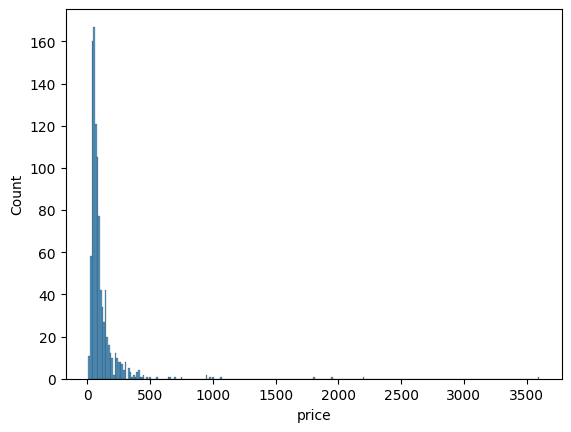

In [11]:
sns.histplot(data=df.sample(1000), x='price')

<Axes: xlabel='society', ylabel='price'>

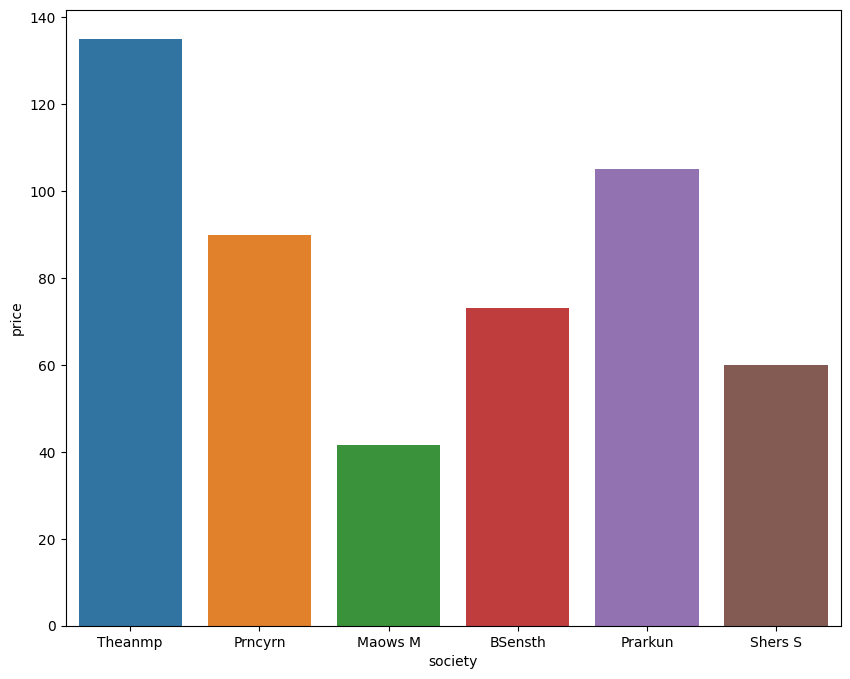

In [12]:
plt.figure(figsize=(10,8))
temp_df = df.society.sample(10)
sns.barplot(data=df, x=temp_df, y='price')

<Axes: xlabel='price', ylabel='bath'>

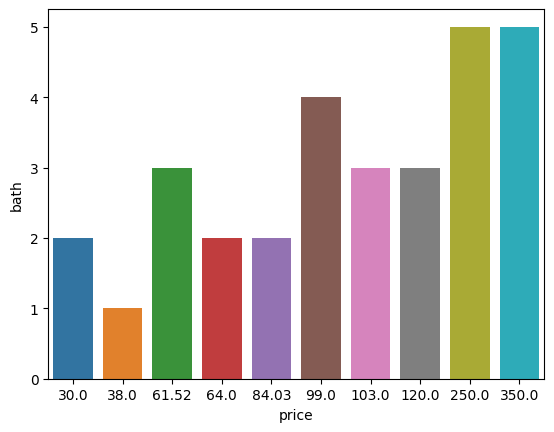

In [13]:
temp_df = df.price.sample(10)
sns.barplot(data=df, x =temp_df , y='bath')

In [14]:
df

availability                  location       size  society total_sqft  \
0             19-Dec  Electronic City Phase II      2 BHK  Coomee        1056   
1      Ready To Move          Chikka Tirupathi  4 Bedroom  Theanmp       2600   
2      Ready To Move               Uttarahalli      3 BHK      NaN       1440   
3      Ready To Move        Lingadheeranahalli      3 BHK  Soiewre       1521   
4      Ready To Move                  Kothanur      2 BHK      NaN       1200   
...              ...                       ...        ...      ...        ...   
13315  Ready To Move                Whitefield  5 Bedroom  ArsiaEx       3453   
13316  Ready To Move             Richards Town      4 BHK      NaN       3600   
13317  Ready To Move     Raja Rajeshwari Nagar      2 BHK  Mahla T       1141   
13318         18-Jun           Padmanabhanagar      4 BHK  SollyCl       4689   
13319  Ready To Move              Doddathoguru      1 BHK      NaN        550   

       bath  balcony   price  
0       2.0      1.0   39.07  
1       5.0      3.0  120.00  
2       2.0      3.0   62.00  
3       3.0      1.0   95.00  
4       2.0      1.0   51.00  
...     ...      ...     ...  
13315   4.0      0.0  231.00  
13316   5.0      NaN  400.00  
13317   2.0      1.0   60.00  
13318   4.0      1.0  488.00  
13319   1.0      1.0   17.00  

[13320 rows x 8 columns]

In [15]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [16]:
df['total_sqft'].dtype

dtype('float64')

In [17]:
df.availability.sample(10)

2421     Ready To Move
7581     Ready To Move
2701     Ready To Move
5541     Ready To Move
11711    Ready To Move
12628    Ready To Move
10956           19-Dec
5903            18-Oct
12256    Ready To Move
10715    Ready To Move
Name: availability, dtype: object

In [18]:
df1 =  df.availability
df1 = pd.DataFrame(df1)

In [19]:
input_cols = ['availability', 'location', 'size', 'society', 'total_sqft','bath','balcony']
target_col = 'price'

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_val, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val, test_size=0.25, random_state=42)

In [22]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]

val_inputs = val_df[input_cols]
val_target = val_df[target_col]

test_inputs =test_df[input_cols]
test_target = test_df[target_col]


In [23]:
numerical_cols = ['total_sqft', 'bath','balcony']
categorical_cols = ['location', 'size', 'society']

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [25]:
train_inputs['total_sqft'] = imputer.fit_transform(np.array(train_inputs['total_sqft']).reshape(-1,1))
val_inputs['total_sqft'] = imputer.fit_transform(np.array(val_inputs['total_sqft']).reshape(-1,1))
test_inputs['total_sqft'] = imputer.fit_transform(np.array(test_inputs['total_sqft']).reshape(-1,1))

/tmp/ipykernel_270/24683375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['total_sqft'] = imputer.fit_transform(np.array(train_inputs['total_sqft']).reshape(-1,1))
/tmp/ipykernel_270/24683375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs['total_sqft'] = imputer.fit_transform(np.array(val_inputs['total_sqft']).reshape(-1,1))
/tmp/ipykernel_270/24683375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [26]:
train_inputs.bath.fillna(-1,inplace=True)
train_inputs.balcony.fillna(-1,inplace=True)

val_inputs.bath.fillna(-1,inplace=True)
val_inputs.balcony.fillna(-1,inplace=True)

test_inputs.bath.fillna(-1,inplace=True)
test_inputs.balcony.fillna(-1,inplace=True)

/tmp/ipykernel_270/600535843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs.bath.fillna(-1,inplace=True)
/tmp/ipykernel_270/600535843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs.balcony.fillna(-1,inplace=True)
/tmp/ipykernel_270/600535843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs.bath.fillna(-1,inplace=True)
/tmp/ipykernel_270/600535843.py:5: SettingWithCopyWarning: 
A value i

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [28]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipykernel_270/162864322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
train_inputs['total_sqft'] = scaler.fit_transform(np.array(train_inputs['total_sqft']).reshape(-1,1))
val_inputs['total_sqft'] = scaler.fit_transform(np.array(val_inputs['total_sqft']).reshape(-1,1))
test_inputs['total_sqft'] = scaler.fit_transform(np.array(test_inputs['total_sqft']).reshape(-1,1))

In [31]:
train_inputs

availability              location   size  society  total_sqft  bath  \
2719   Ready To Move        Sarjapur  Road  3 BHK      NaN    0.023321   3.0   
7911   Ready To Move        CV Raman Nagar  2 BHK  Mancyes    0.019112   2.0   
813           17-Jul            Anandapura  2 BHK  ViensRK    0.021809   2.0   
11597  Ready To Move           Thanisandra  2 BHK  MenueNo    0.022651   2.0   
6349   Ready To Move           Brookefield  2 BHK  Bhiya N    0.021025   2.0   
...              ...                   ...    ...      ...         ...   ...   
8383   Ready To Move              Kadugodi  2 BHK  KMnorab    0.026650   2.0   
864    Ready To Move     Kodichikkanahalli  2 BHK  Prs 2hi    0.019016   2.0   
10354  Ready To Move  5th Block Hbr Layout  2 BHK      NaN    0.021025   2.0   
7047   Ready To Move             TC Palaya  2 BHK      NaN    0.028677   2.0   
6564   Ready To Move                Jigani  3 BHK  DLhtsan    0.022938   3.0   

       balcony  location_ Anekal  location_ Banaswadi  location_ Basavangudi  \
2719       3.0               0.0                  0.0                    0.0   
7911       1.0               0.0                  0.0                    0.0   
813        1.0               0.0                  0.0                    0.0   
11597      2.0               0.0                  0.0                    0.0   
6349       1.0               0.0                  0.0                    0.0   
...        ...               ...                  ...                    ...   
8383       2.0               0.0                  0.0                    0.0   
864        1.0               0.0                  0.0                    0.0   
10354      2.0               0.0                  0.0                    0.0   
7047       0.0               0.0                  0.0                    0.0   
6564       2.0               0.0                  0.0                    0.0   

       ...  society_Wiowsri  society_WishiVa  society_WoarkEm  \
2719   ...              0.0              0.0              0.0   
7911   ...              0.0              0.0              0.0   
813    ...              0.0              0.0              0.0   
11597  ...              0.0              0.0              0.0   
6349   ...              0.0              0.0              0.0   
...    ...              ...              ...              ...   
8383   ...              0.0              0.0              0.0   
864    ...              0.0              0.0              0.0   
10354  ...              0.0              0.0              0.0   
7047   ...              0.0              0.0              0.0   
6564   ...              0.0              0.0              0.0   

       society_YCnce R  society_YMhenLi  society_Zonce E  society_Zostaa   \
2719               0.0              0.0              0.0              0.0   
7911               0.0              0.0              0.0              0.0   
813                0.0              0.0              0.0              0.0   
11597              0.0              0.0              0.0              0.0   
6349               0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
8383               0.0              0.0              0.0              0.0   
864                0.0              0.0              0.0              0.0   
10354              0.0              0.0              0.0              0.0   
7047               0.0              0.0              0.0              0.0   
6564               0.0              0.0              0.0              0.0   

       society_i1ncyRe  society_i1rtsCo  society_nan  
2719               0.0              0.0          1.0  
7911               0.0              0.0          0.0  
813                0.0              0.0          0.0  
11597              0.0              0.0          0.0  
6349               0.0              0.0          0.0  
...                ...              ...          .

In [32]:
x_train = train_inputs[numerical_cols+encoded_cols]
x_val = val_inputs[numerical_cols+encoded_cols]
x_test = test_inputs[numerical_cols+encoded_cols]

In [33]:
from sklearn.metrics import mean_squared_error
def rmse(a,b):
    return mean_squared_error(a,b,squared=False)

## Either we can do the data cleaning by pipelines

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [35]:
#Only one column is need to scalling soo we didn't put that column into pipeline rather we gonna do this by manual to save time
#scaler already defined
numerical_transformer = scaler
#for categorical cols
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # encoder already defined
    ('one-hot', encoder),
])
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

## Importing the model

In [36]:
from xgboost import XGBRegressor

In [37]:
model = XGBRegressor(n_jobs=-1, n_estimators=20, max_depth=4, random_state=42)

## Now we can make Pass Data to Pipeline or just manually train it Which is more convient is upto the data processing

In [38]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
#now you can compute predictions after setting some hyperparameters right by my_pipeline.predict(testdata)

In [39]:
model.fit(x_train,train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
preds = model.predict(x_train)

In [41]:
rmse(preds,train_target)

73.75218664161865

In [42]:
rmse(model.predict(x_val), val_target)

130.07208504092213

In [43]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = 25,25

<Axes: >

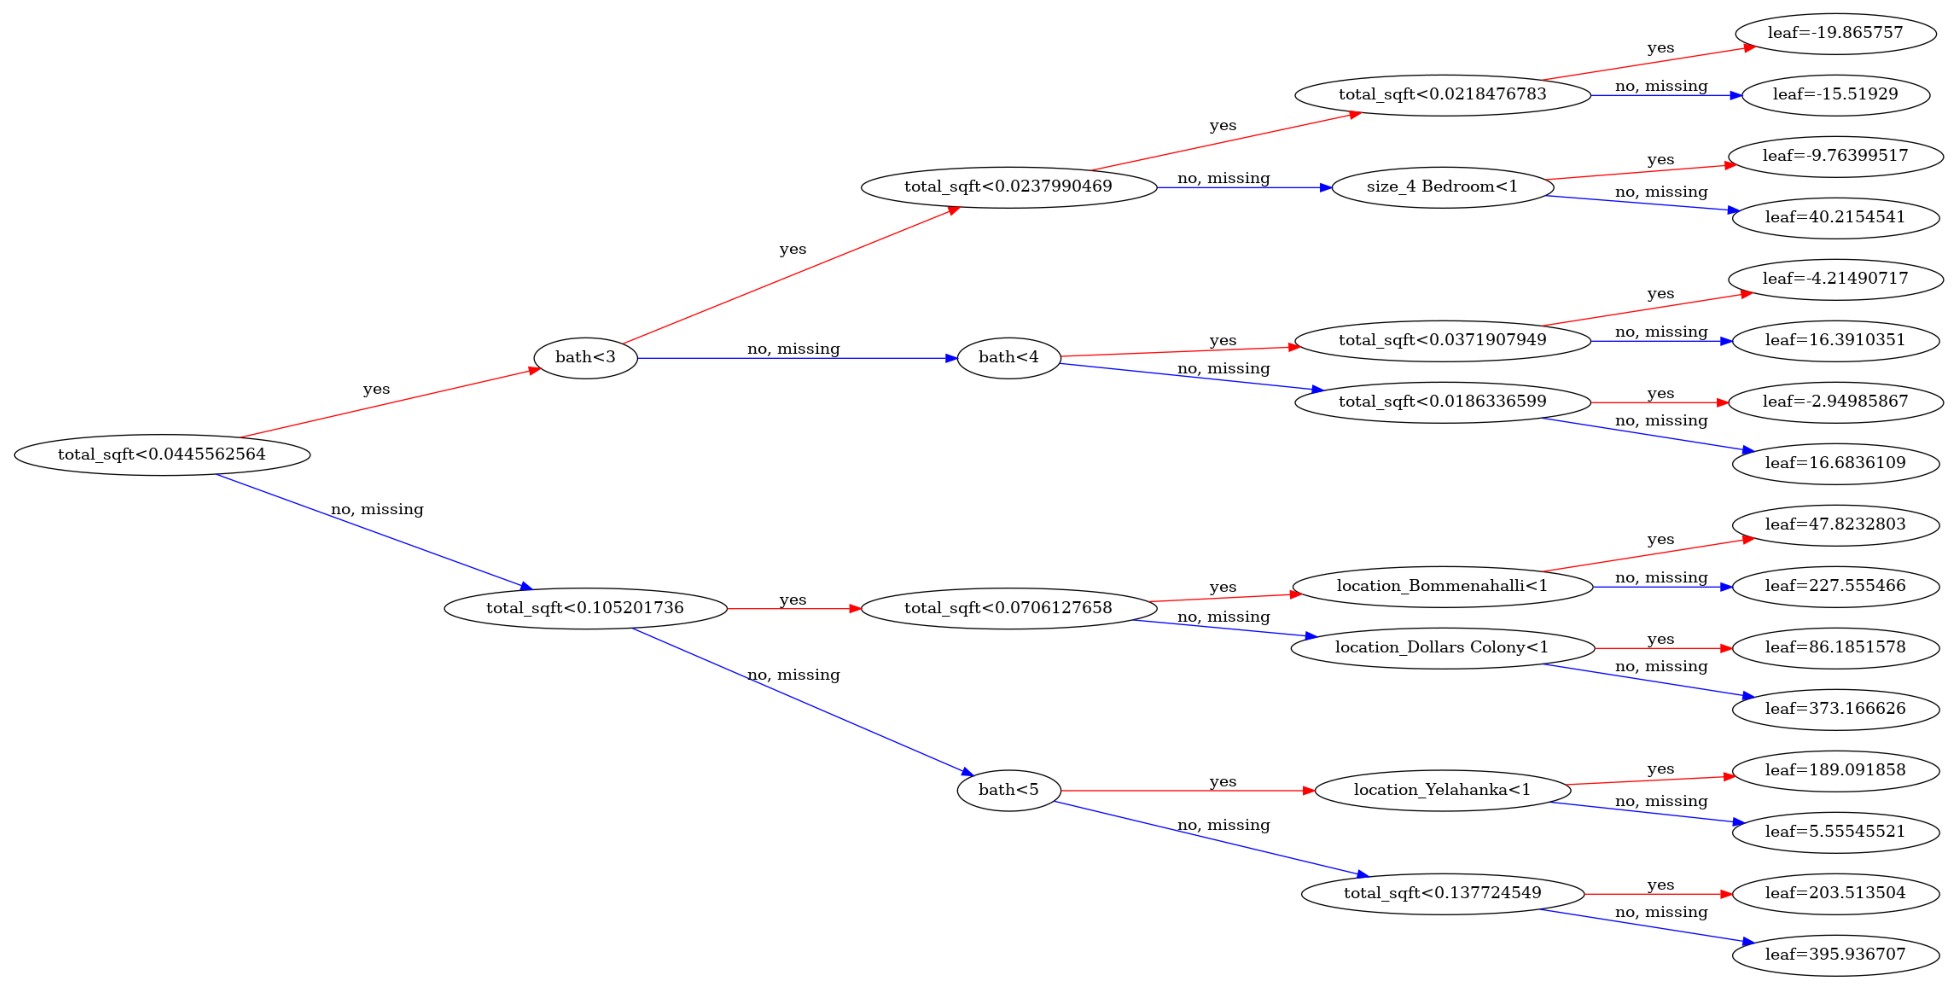

In [44]:
plot_tree(model,rankdir='LR')

<Axes: >

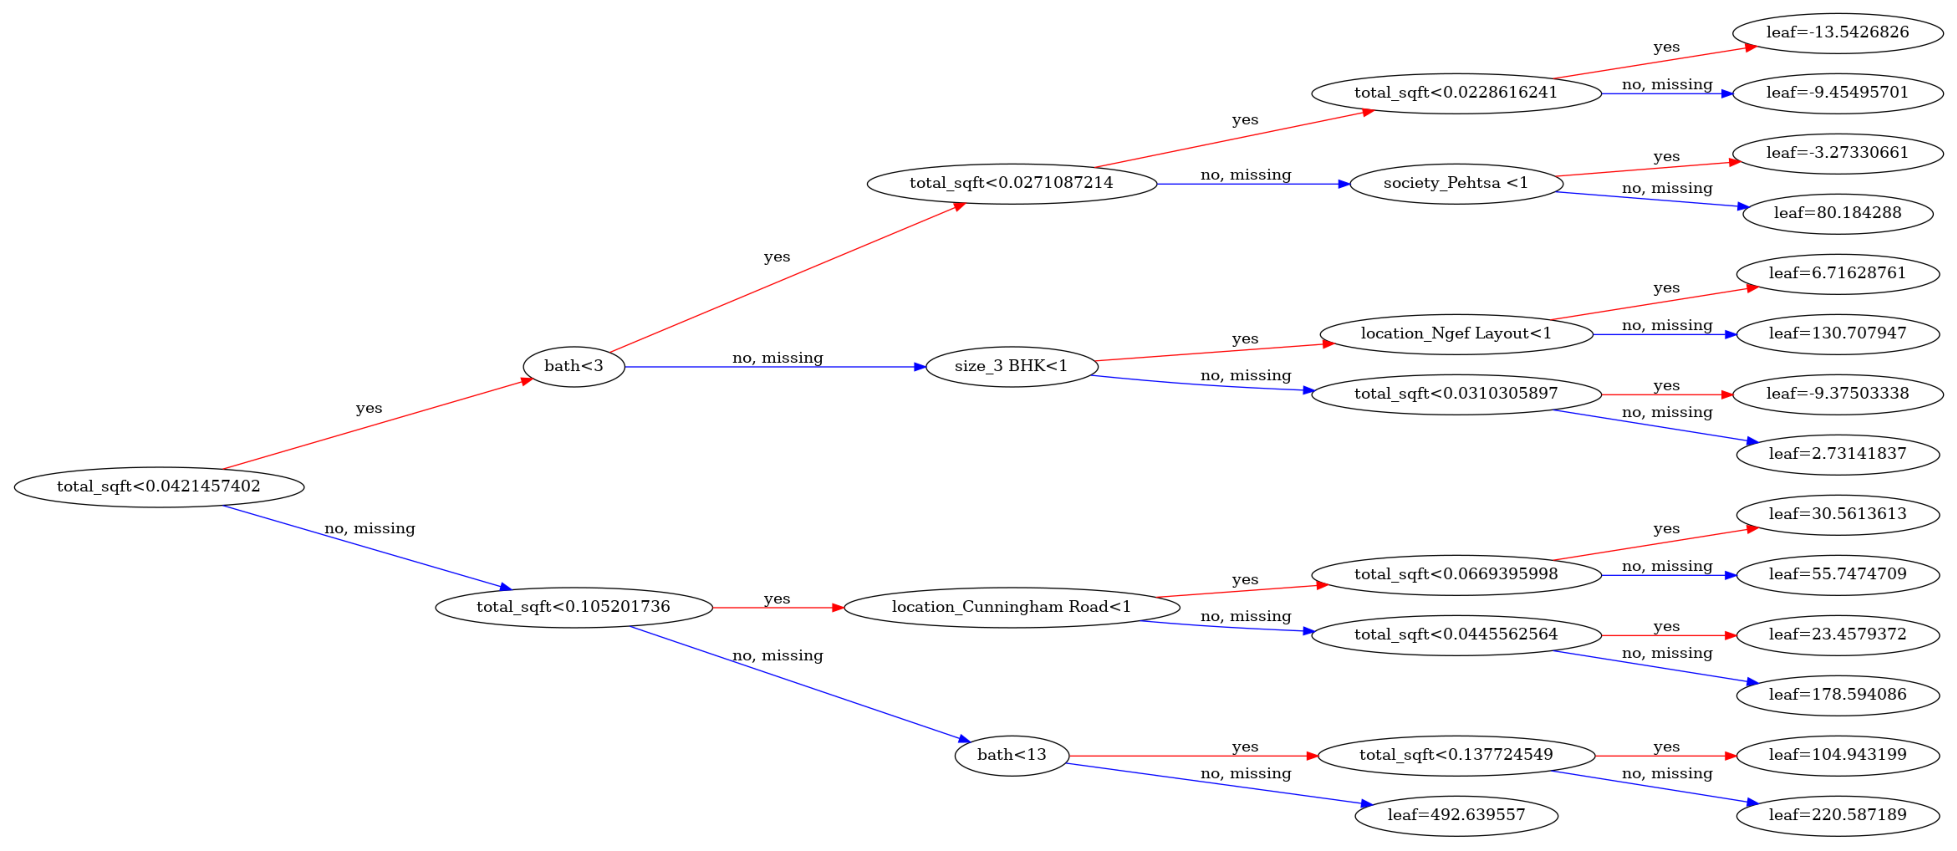

In [45]:
plot_tree(model,rankdir='LR', num_trees=1)

<Axes: >

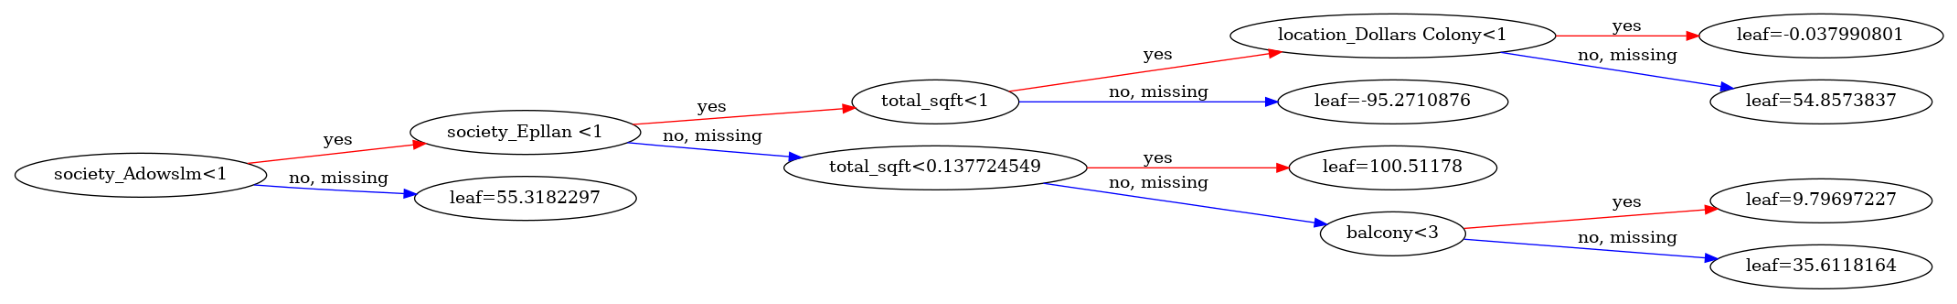

In [46]:
plot_tree(model,rankdir='LR', num_trees=19)

In [47]:
trees = model.get_booster().get_dump()
len(trees)

20

In [48]:
print(trees[0])

0:[total_sqft<0.0445562564] yes=1,no=2,missing=2
	1:[bath<3] yes=3,no=4,missing=4
		3:[total_sqft<0.0237990469] yes=7,no=8,missing=8
			7:[total_sqft<0.0218476783] yes=15,no=16,missing=16
				15:leaf=-19.865757
				16:leaf=-15.51929
			8:[size_4 Bedroom<1] yes=17,no=18,missing=18
				17:leaf=-9.76399517
				18:leaf=40.2154541
		4:[bath<4] yes=9,no=10,missing=10
			9:[total_sqft<0.0371907949] yes=19,no=20,missing=20
				19:leaf=-4.21490717
				20:leaf=16.3910351
			10:[total_sqft<0.0186336599] yes=21,no=22,missing=22
				21:leaf=-2.94985867
				22:leaf=16.6836109
	2:[total_sqft<0.105201736] yes=5,no=6,missing=6
		5:[total_sqft<0.0706127658] yes=11,no=12,missing=12
			11:[location_Bommenahalli<1] yes=23,no=24,missing=24
				23:leaf=47.8232803
				24:leaf=227.555466
			12:[location_Dollars Colony<1] yes=25,no=26,missing=26
				25:leaf=86.1851578
				26:leaf=373.166626
		6:[bath<5] yes=13,no=14,missing=14
			13:[location_Yelahanka<1] yes=27,no=28,missing=28
				27:leaf=189.091858
				28:le

## Let's adjust some of hyperparameters

In [49]:
def test_params(**params):
    model = XGBRegressor(n_jobs=1, random_state=42, **params)
    model.fit(x_train,train_target)
    train_rmse = rmse(model.predict(x_train), train_target)
    val_rmse = rmse (model.predict(x_val), val_target)
    print("train rmse {}, val rmse {} ".format(train_rmse, val_rmse))

In [50]:
test_params(n_estimators=120)

train rmse 41.2411912205115, val rmse 133.3331990435185 


In [51]:
test_params(n_estimators=140)

train rmse 39.86827265736989, val rmse 133.0423014618711 


In [52]:
test_params(n_estimators=240)

train rmse 33.99278702233467, val rmse 133.0739554397508 


In [53]:
test_params(n_estimators=150)

train rmse 39.106094671175605, val rmse 132.77993300728403 


In [54]:
max_depth = [test_params(max_depth=x) for x in range(31)]

train rmse 6.175692334536245, val rmse 205.2248905084791 
train rmse 88.57891785709388, val rmse 122.87989786332791 
train rmse 71.94232573671036, val rmse 126.8016815439606 
train rmse 60.95129520235464, val rmse 127.81215101203637 
train rmse 55.301808344908146, val rmse 133.69778371895626 
train rmse 48.89773060310726, val rmse 127.40525573205473 
train rmse 43.770300424893236, val rmse 133.23775725295042 
train rmse 39.6432288834339, val rmse 131.70339916647495 
train rmse 37.27424260947192, val rmse 138.96609283031037 
train rmse 33.5575153584156, val rmse 153.00732056374574 
train rmse 30.528000633885764, val rmse 145.37359316004122 
train rmse 28.239491906121614, val rmse 149.9117649933672 
train rmse 26.038750390534716, val rmse 153.5659042430318 
train rmse 24.65596618327064, val rmse 157.51413045594154 
train rmse 23.702816569974775, val rmse 161.4606399310043 
train rmse 21.042983229862582, val rmse 166.28888035181112 
train rmse 20.451005764425734, val rmse 164.413427018637

In [55]:
#max_depth =5 is better the turning point

In [56]:
test_params(n_estimators=140, learning_rate=0.01)

train rmse 87.56597943638667, val rmse 116.38493395482531 


In [57]:
test_params(n_estimators=140, learning_rate=0.1)

train rmse 53.39314808859697, val rmse 131.17960249853908 


In [58]:
test_params(n_estimators=140, learning_rate=0.3)

train rmse 39.86827265736989, val rmse 133.0423014618711 


In [59]:
test_params(n_estimators=140, learning_rate=0.09)

train rmse 54.62086223474062, val rmse 133.62654972717647 


In [60]:
test_params(n_estimators=140, learning_rate=0.08)

train rmse 56.06310761971487, val rmse 133.62669346005399 


In [61]:
#learning rate 0.09 is looks better

In [62]:
test_params(booster='gblinear')

train rmse 75.18532275336784, val rmse 107.79309937254105 


# Put it all together

In [63]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=135, max_depth=5, learning_rate=0.09, booster='gblinear')

In [64]:
model.fit(x_train,train_target)

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=135, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
preds = model.predict(x_train)

In [66]:
preds

array([73.77281 , 38.89518 , 42.405167, ..., 67.773155, 29.677376,
       75.54588 ], dtype=float32)

In [67]:
rmse(preds,train_target)

75.71678388189682

In [68]:
rmse(model.predict(x_val),val_target)

104.65999867168739

In [69]:
rmse(model.predict(x_test),test_target)

97.61717886667861

## Time for Kfold validation

In [70]:
from sklearn.model_selection import KFold

In [71]:
kfold = KFold(n_splits=10)

In [72]:
def train_n_evaluate(x_train,y_train,x_val,val_target, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(x_train,y_train)
    train_rmse = rmse(model.predict(x_train),y_train)
    val_rmse = rmse(model.predict(x_val), val_target)
    return model, train_rmse,val_rmse

In [73]:
models=[]
for train_idxs, val_idxs in kfold.split(x_train):
    X_train,Train_targets = x_train.iloc[train_idxs], train_target.iloc[train_idxs]
    Val_test,Val_targets = x_train.iloc[val_idxs], train_target.iloc[val_idxs]
    model, train_rmse, val_rmse = train_n_evaluate(X_train,Train_targets,Val_test,Val_targets,n_estimators=135, max_depth=5, learning_rate=0.09, booster='gblinear')
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 70.41369529126239, Validation RMSE: 145.63574338518976


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 73.46660194193299, Validation RMSE: 141.38504749255094


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 76.53023642172285, Validation RMSE: 100.11894209564007


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 73.6913346268595, Validation RMSE: 116.45412202406261


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 71.08275737550474, Validation RMSE: 133.38073789625102


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 74.34842143997332, Validation RMSE: 153.8044521108745


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 73.5014369244511, Validation RMSE: 130.12869313224377


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 77.73435077165641, Validation RMSE: 88.07840142954318


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:22:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 75.88973359863479, Validation RMSE: 107.1197831187902


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [10:23:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 72.44371813476666, Validation RMSE: 135.02746181962294


In [74]:
import numpy as np

def predict_avg(models, x_train):
    return np.mean([model.predict(x_train) for model in models], axis=0)

In [75]:
preds = predict_avg(models,x_val)

In [76]:
rmse(preds, val_target)

104.77447099271528

In [77]:
df.columns

Index(['availability', 'location', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [78]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce') 
my_pipeline = my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, n_estimators=135, learning_rate=0.09, booster='gblinear'))
])
my_pipeline.fit(df.drop(['price'], axis=1),df['price'])
def predict_price(inputs):
    df_in = pd.DataFrame([inputs])
    df_in['total_sqft'] = pd.to_numeric(df_in['total_sqft'], errors='coerce')
    df_in['total_sqft'] = scaler.transform(np.array(df_in['total_sqft']).reshape(-1,1))
    df.bath.fillna(-1,inplace=True)
    df.balcony.fillna(-1,inplace=True)
    return my_pipeline.predict(df)[0]

In [79]:
inputs={'area_type':'Super built-up Area',
       'availability': '19-Dec',
       'location': 'Electronic City Phase II',
        'society': 'Coomee',
        'total_sqft': 1056.0,
        'bath': 2.0,
        'balcony': 1.0,
       }

## Saving Models as pickle

In [80]:
import pickle 
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [81]:
import json
columns={
    'data_columns' : [col.lower() for col in df.drop('price', axis=1).columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))